<a href="https://colab.research.google.com/github/Glutamato/Barrios_tic/blob/master/%5BPF_Bonus%5DSIRD_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Insert code here
import matplotlib.pylab as plt
from scipy.special import erf
import pandas as pd
import numpy as np 

def rk4vec(t0, y0, dt, f):
    k1 = f(t0, y0)
    k2 = f(t0 + dt/2.0, y0 + dt * k1 / 2.0)
    k3 = f(t0 + dt/2.0, y0 + dt * k2 / 2.0)
    k4 = f(t0 + dt, y0 + dt * k3)
    y = y0 + (dt/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return y

class SIRD_model():

  def __init__(self, init_condition, tmin = 0., tmax = 50., n = 10000, **params):
    self.tmin = tmin
    self.tmax = tmax
    self.n = n
    self.t = np.linspace(self.tmin, self.tmax, self.n)
    self.dt = self.t[1] - self.t[0]
    self.S = np.zeros([self.n])
    self.I = np.zeros([self.n])
    self.R = np.zeros([self.n])
    self.D = np.zeros([self.n])
    self.set_params(**params)
    self.init_condition = init_condition 

  def set_params(self, beta, miu, delta, max_population):
    # definición de parametros del modelo
    self.beta = beta
    self.miu =  miu
    self.delta = delta
    self.max_population = max_population

  def func(self, t, u):
    #sistema of EDOs
    self.uprime = np.zeros_like(u)
    self.uprime[0] = -self.beta*u[0]*u[1]/self.max_population
    self.uprime[1] = self.beta*u[0]*u[1]/self.max_population-self.miu*u[1]
    self.uprime[2] = self.miu*u[1]
    self.uprime[3] = self.delta*u[1]
    return self.uprime

  def run_solver(self):
      # ejecutar solucion por RK4
      self.u0 = np.array(self.init_condition)
      self.u1 = np.zeros_like(self.u0)
      for i in range(self.n):
        self.S[i] = self.u0[0]
        self.I[i] = self.u0[1]
        self.R[i] = self.u0[2]
        self.D[i] = self.u0[3]
        self.u1 = rk4vec(self.t[i], self.u0, self.dt, self.func)
        self.u0 = np.copy(self.u1)

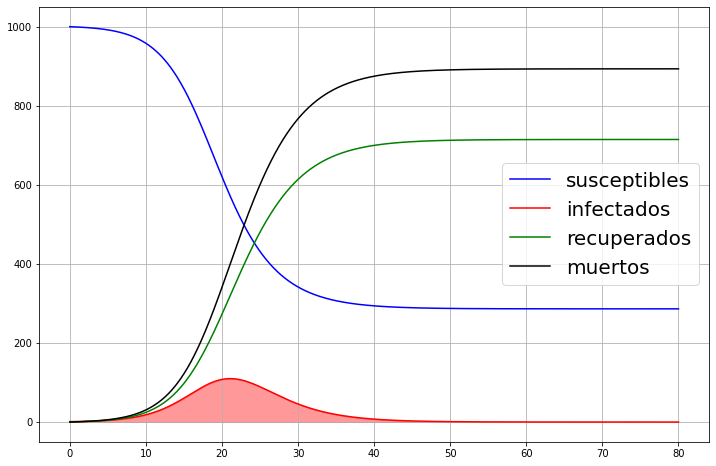

In [ ]:
max_population = 1000
params = {'beta': 0.7, 'miu': 0.4, 'delta': 0.5, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0]
model = SIRD_model(init_condition=init_condition, tmax=80, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(12,8))
plt.plot(model.t, model.S, label = 'susceptibles', color = 'b')
plt.plot(model.t, model.I, label = 'infectados', color = 'r')
plt.plot(model.t, model.R, label = 'recuperados', color = 'g')
plt.plot(model.t, model.D, label = 'muertos', color = 'k')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()